In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import io
import requests
from datetime import date

In [2]:
url1="https://covid.ourworldindata.org/data/new_cases.csv"
url2="https://covid.ourworldindata.org/data/new_deaths.csv"
s1=requests.get(url1).content
s2=requests.get(url2).content
new_cases=pd.read_csv(io.StringIO(s1.decode('utf-8')))
new_deaths=pd.read_csv(io.StringIO(s2.decode('utf-8')))

countries = new_cases.columns[1:]

keys = new_cases.columns[1:].tolist()
values = np.arange(0,len(keys))
countries_dict = dict(zip(keys, values))


In [3]:
def graf1(x):
    
    x=x
    #Creates the new df forcountry x
    df = pd.DataFrame(columns={'date','New Cases','New Deaths','New Cases Trendline','New Deaths Trendline'})
    df['date']= new_cases['date']
    df['New Cases']=new_cases[countries[x]]
    df['New Deaths']=new_deaths[countries[x]]
    df['New Cases Trendline'] = df['New Cases'].rolling(4).mean()
    df['New Deaths Trendline'] = df['New Deaths'].rolling(4).mean()

    width = 0.35 
    fig =plt.figure(figsize=(11,7))

    ax = fig.add_subplot(111) 
    ax2 = ax.twinx()
    bar1 = df['New Cases'].plot(kind='bar', color='blue',alpha=0.2,
                            ax=ax, width=width, 
                            position=0, label='New Cases',x='index')

    bar2 = df['New Deaths'].plot(kind='bar', color='red',alpha=0.2, 
                             ax=ax2, width=width, 
                             position=1, label='New Deaths', x='index')

    trend1 = df['New Cases Trendline'].plot(kind='line',lw=3, color='blue',ax=ax, label='4 Days Moving Average of New Cases',x='index')
    trend2 = df['New Deaths Trendline'].plot(kind='line',lw=3, color='red',ax=ax2, label='4 Days Moving Average of New Deaths',x='index')

    plt.title(countries[x], fontsize=20,loc='left')
    ax.set_ylabel('New Cases')
    ax2.set_ylabel('New Deaths')

    ax.set_xticks(np.arange(0,len(df.date),2))
    dates= df.date.iloc[::2]
    ax.set_xticklabels(dates,rotation=45)
    
    #Set y limits
    y1_max = df['New Cases'].max()
    y1_max = y1_max*1.2+1 #+1 to avoid max and min to both 0
    
    y2_max = df['New Deaths'].max()
    y2_max = y2_max*1.2+1 #+1 to avoid max and min to both 0

    try:
        ax2.set_ylim([0,y2_max])
    except:
        y2_max=10

    ax.set_ylim([0,y1_max])
    ax2.set_ylim([0,y2_max])

    ax.legend(loc=2)
    ax2.legend(loc=1)

    fig.tight_layout()
    fig.savefig(countries[x])


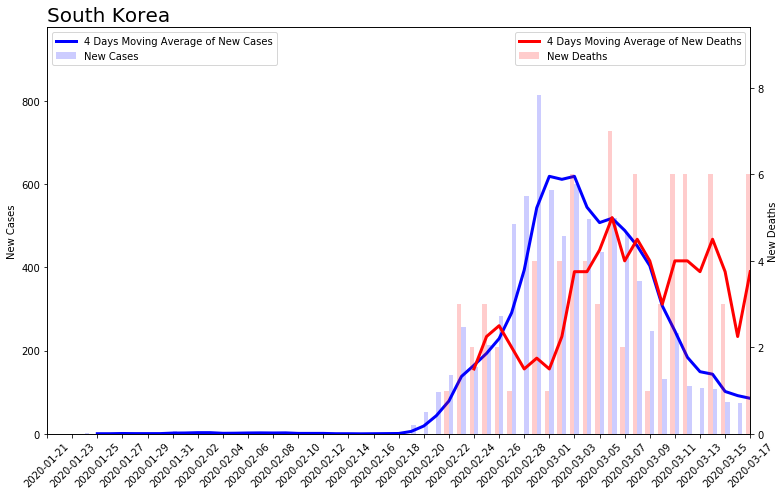

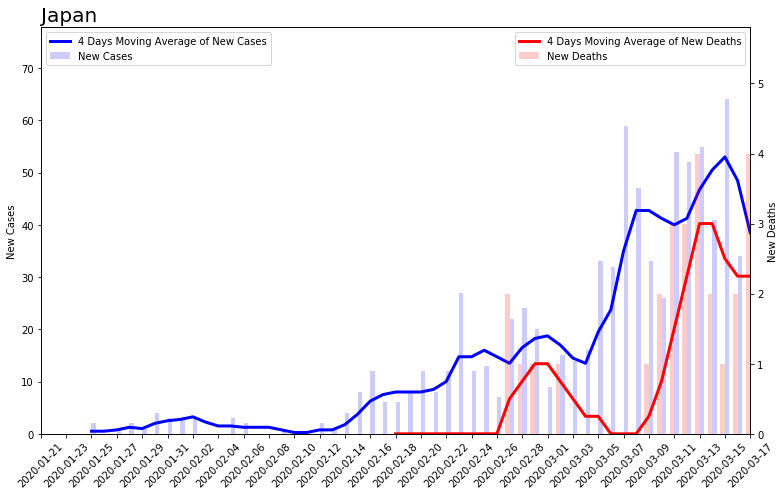

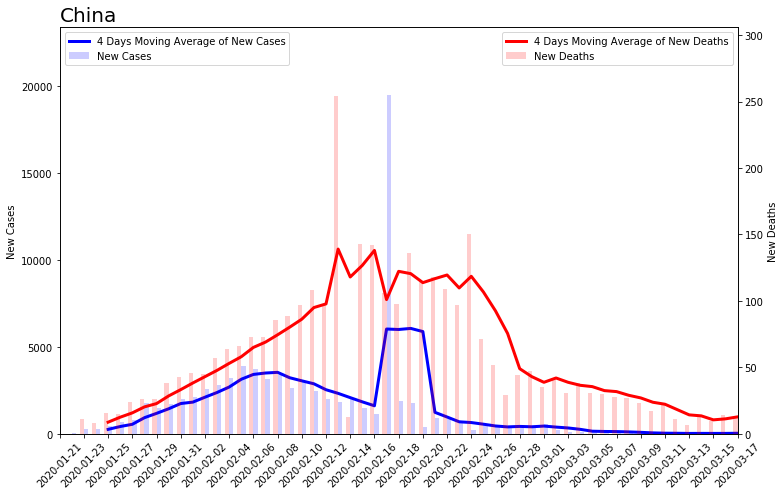

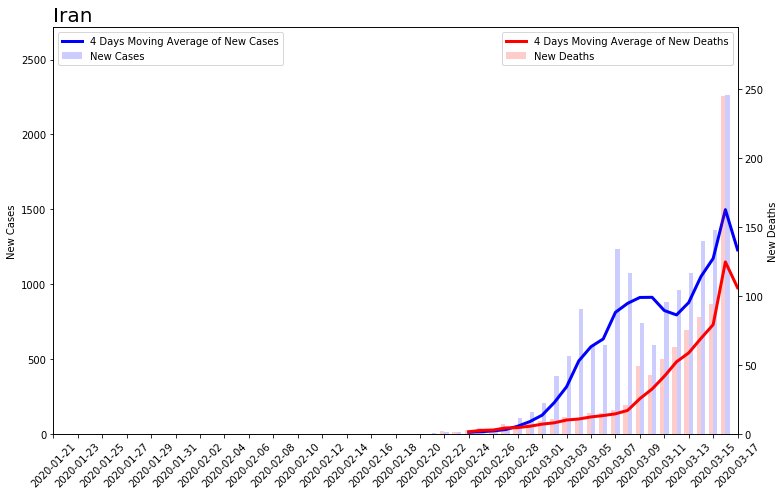

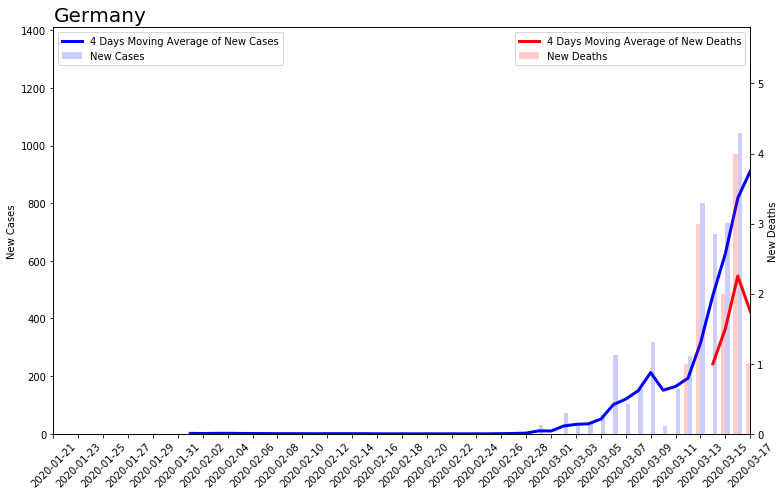

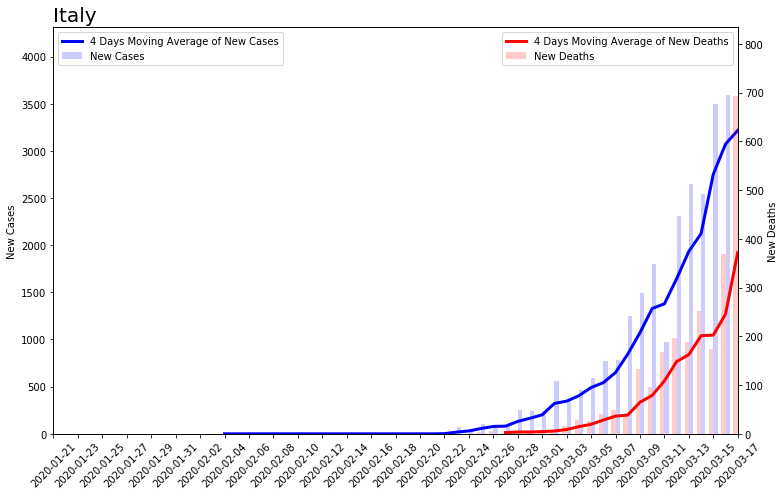

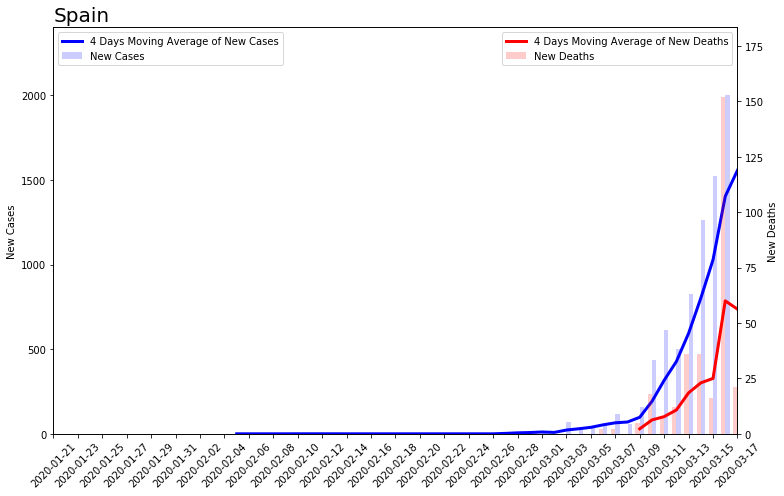

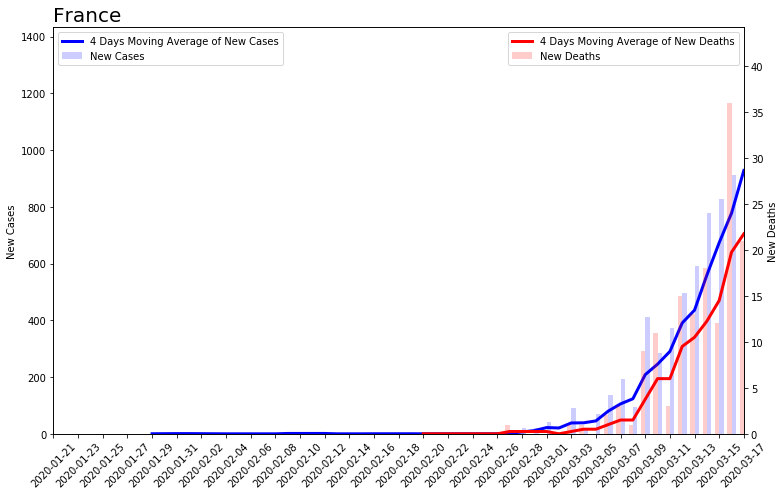

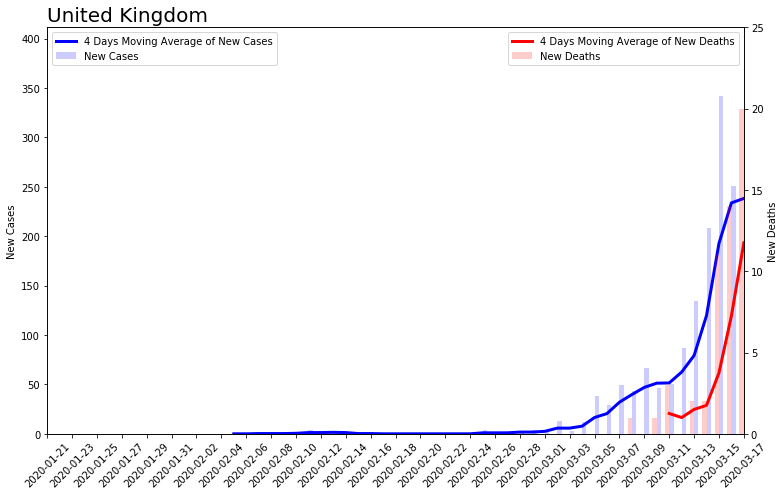

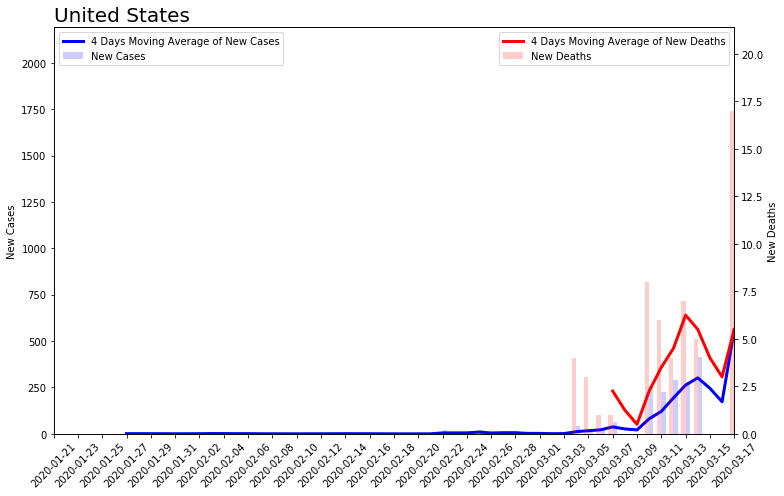

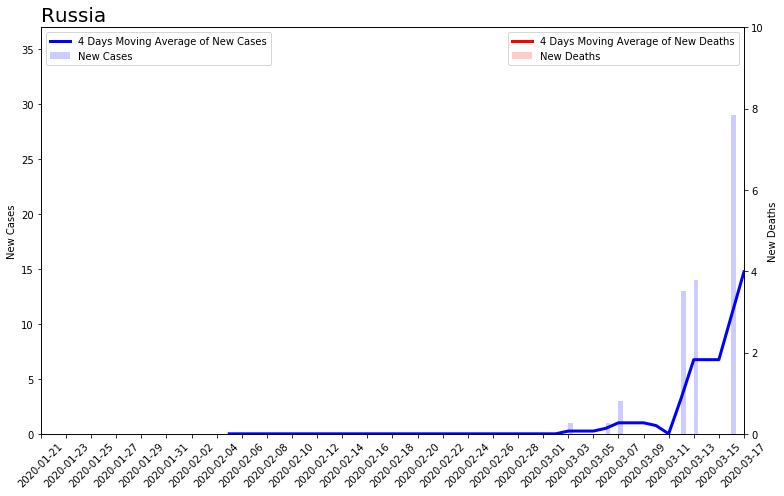

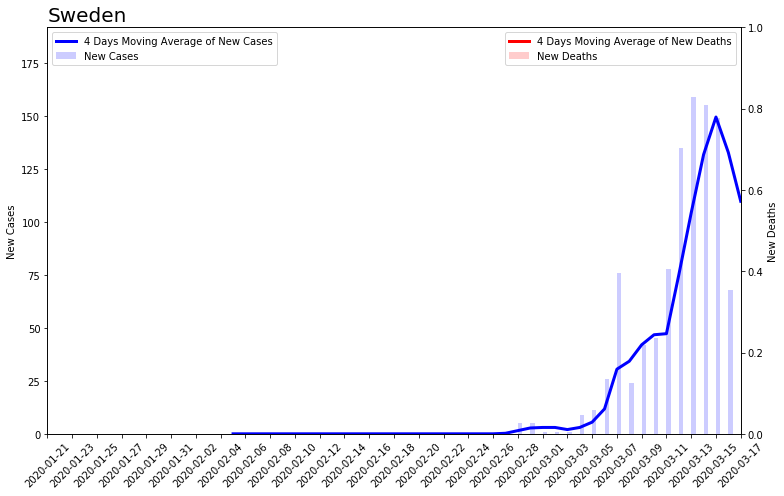

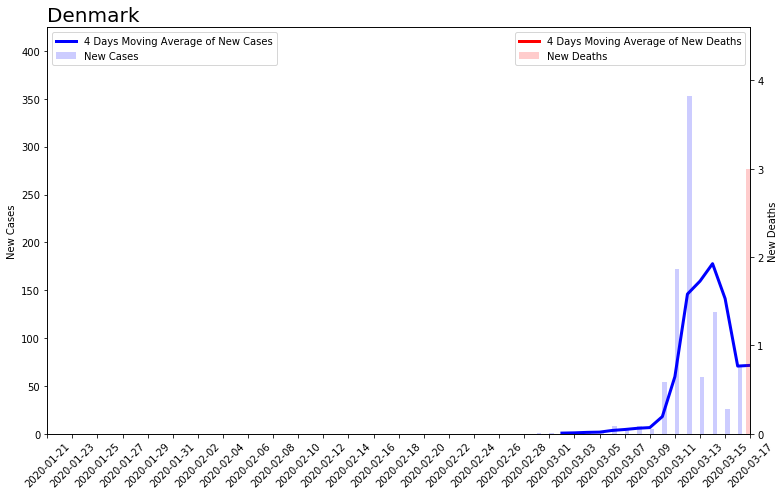

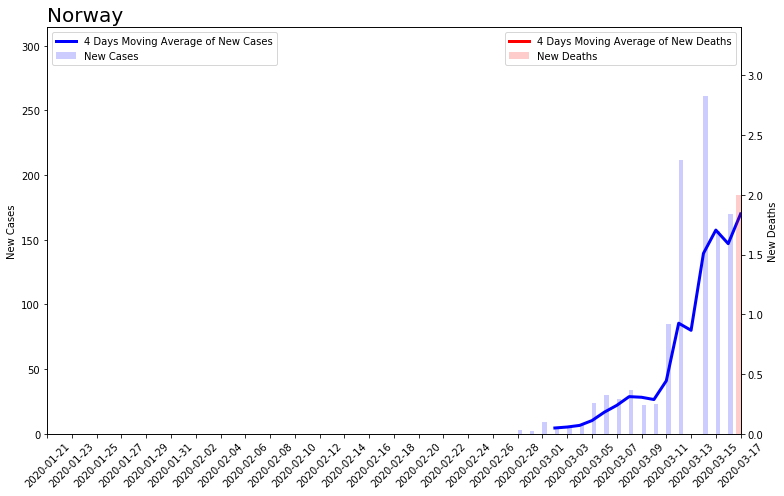

In [6]:
check = ['South Korea', 'Japan', 'China','Iran', 
         'Germany', 'Italy', 'Spain','France',
         'United Kingdom', 'United States', 
         'Russia',
         'Sweden','Denmark','Norway']

i=0
while i < len(check):
    x = countries_dict[check[i]]
    graf1(x)
    i=i+1